<a href="https://colab.research.google.com/github/satria-mitra/CASA0018-Cloud-Classification/blob/main/Projects/Final_Project/CASA0018_cloud_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Instruction**

This project, Cloud classification, is part of CASA0018 Deep Learning project. The dataset is available to download from the link below. However, some images are taken by myself or from publis image repository such as Flickr. Follow the steps on this tutorial to see the result. One may have different result since the datasets are not identic.


1.   Download Cirrus Cumulus Stratus Nimbus (CCSN) Database
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/CADDPD&version=2.0

2.   Download Howard-Cloud-X
https://www.kaggle.com/datasets/imbikramsaha/howard-cloudx/code

### **Data Cleaning**
#### Manual checking the image

While CCSN datasets has 10 cloud types + 1 contrail, Howard-Cloud-X only has 10 cloud types without contrail.

First, lets see how many pictures for each type of cloud from the two datasets

In [2]:
import cv2 #opencv
import os
import time
import uuid

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
CCSN_path = '/content/drive/MyDrive/Kuliah/UCL/Projects/CASA0018-Cloud-Classification/Projects/Final_Project/Datasets/CCSN_v2' #Directories of Google Drive

os.chdir(CCSN_path) #Go to path
os.listdir(CCSN_path) #List out files in the path
print("Files and directories in '", CCSN_path, "' :", os.listdir(CCSN_path))

Files and directories in ' /content/drive/MyDrive/Kuliah/UCL/Projects/CASA0018-Cloud-Classification/Projects/Final_Project/Datasets/CCSN_v2 ' : ['Sc', 'Ns', 'Ci', 'Cu', 'Cs', 'Ct', 'St', 'As', 'Cc', 'Ac', 'Cb']


In [5]:
Howard_path = '/content/drive/MyDrive/Kuliah/UCL/Projects/CASA0018-Cloud-Classification/Projects/Final_Project/Datasets/Howard-Cloud-X' #Directories of Google Drive
os.chdir(Howard_path) #Go to path
os.listdir(Howard_path) #List out files in the path
print("Files and directories in '", Howard_path, "' :", os.listdir(Howard_path))

Files and directories in ' /content/drive/MyDrive/Kuliah/UCL/Projects/CASA0018-Cloud-Classification/Projects/Final_Project/Datasets/Howard-Cloud-X ' : ['Ac', 'As', 'Cc', 'Cs', 'Ci', 'Cb', 'Cu', 'Ns', 'Sc', 'St']


In [76]:
CCSN_dir = os.listdir(CCSN_path)
for dir_name in CCSN_dir:
    # Create the full path to the directory
    dir_path = os.path.join(CCSN_path, dir_name)

    # Get a list of files in the directory
    files = os.listdir(dir_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dir_name}: {num_files} files")

Sc: 208 files
Ns: 162 files
Ci: 74 files
Cu: 109 files
Cs: 58 files
Ct: 155 files
St: 257 files
As: 65 files
Cc: 105 files
Ac: 118 files
Cb: 193 files


In [77]:
Howard_dir = os.listdir(Howard_path)
for dir_name in Howard_dir:
    # Create the full path to the directory
    dir_path = os.path.join(Howard_path, dir_name)

    # Get a list of files in the directory
    files = os.listdir(dir_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dir_name}: {num_files} files")

Ac: 136 files
As: 187 files
Cc: 131 files
Cs: 129 files
Ci: 120 files
Cb: 124 files
Cu: 188 files
Ns: 131 files
Sc: 132 files
St: 137 files


#### Combine files from both datasets

In [78]:
import shutil

combined_path = '/content/combined_datasets_new'
for dir_name in os.listdir(CCSN_path):
    combined_subdir = os.path.join(combined_path, dir_name)
    if not os.path.exists(combined_subdir):
        os.makedirs(combined_subdir)

# Function to copy files from source to destination
def copy_files(source_path):
    for dir_name in os.listdir(source_path):
        source_dir_path = os.path.join(source_path, dir_name)
        destination_dir_path = os.path.join(combined_path, dir_name)

        if not os.path.exists(destination_dir_path):
            os.makedirs(destination_dir_path)


        for file_name in os.listdir(source_dir_path):
            src_file_path = os.path.join(source_dir_path, file_name)
            dst_file_path = os.path.join(destination_dir_path, file_name)

            file_counter = 1
            while os.path.exists(dst_file_path):
                name, ext = os.path.splitext(file_name)
                new_name = f"{name}_{file_counter}{ext}"
                dst_file_path = os.path.join(destination_dir_path, new_name)
                file_counter += 1

            # Copy the file to the destination directory
            shutil.copy(src_file_path, dst_file_path)

copy_files(CCSN_path)
copy_files(Howard_path)


#### Recheck how many files there are in each cloud types

In [90]:
combined_path = '/content/combined_datasets'
combined_dir = os.listdir(combined_path)

for dir_name in combined_dir:
    # Create the full path to the directory
    dir_path = os.path.join(combined_path, dir_name)

    # Get a list of files in the directory
    files = os.listdir(dir_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dir_name}: {num_files} files")

Ci: 194 files
Ns: 293 files
Sc: 340 files
Cu: 297 files
Cc: 236 files
Ac: 254 files
As: 252 files
St: 394 files
Cb: 317 files
Cs: 187 files
Ct: 155 files


#### **Ohh noo**
Looks like our dataset is imbalance, and some cloud even has less than 200 pictures. Let's add more dataset.

This is how you can add more dataset:
1. Download one by one image from Google or Flickr.

**or**


2. Bulk download using some Python scripts.
I opt for this option because I'm a ~lazy~ clever person (sorry Duncan)

I found the way [how to bulk download images from Flickr](https://www.youtube.com/watch?v=9sBQqlTtQ2k) on Youtube. Credits goes to [Jeff Heaton](https://www.heatonresearch.com/) for his amazing [pyimgdata](https://github.com/jeffheaton/pyimgdata) script to download image from Flickr.
What really surprising is this python code still working eventhough it is already 4 years old!.

Now lets run the code

#### **Run pyimgdata scripts**

1. First, you need to [register](https://www.flickr.com/services/apps/create/apply) for Flickr API, then you will obtain your `key`and `secret`.
2. download [pyimgdata](https://github.com/jeffheaton/pyimgdata) from Github.
3. Open `config_flickr.ini` file and insert your `key`and `secret`. Also edit other variables for your desire projects.
4. Import flickr API and Pillow packages


In [28]:
pip install flickrapi

In [38]:
from PIL import Image

5. Run the `flickr-download.py` on your machine. For my case, I will run 11 times since I want to add more datasets for 11 cloud types

In [59]:
import os
os.chdir('/content')
!python flickr-download.py

2024-04-24 10:07:51,811 - root - INFO : Line 166 - Starting...
/content/flickr-download.py:131: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  Image.ANTIALIAS)
2024-04-24 10:08:14,386 - root - INFO : Line 158 - Writing sources file.
2024-04-24 10:08:14,387 - root - INFO : Line 192 - Complete, elapsed time: 0:00:22.58


In [91]:
flickr_path = '/content/flickr_datasets'
flickr_dir = os.listdir(flickr_path)

for dir_name in flickr_dir:
    # Create the full path to the directory
    dir_path = os.path.join(flickr_path, dir_name)

    # Get a list of files in the directory
    files = os.listdir(dir_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dir_name}: {num_files} files")

Ci: 352 files
Ns: 352 files
Sc: 352 files
Cu: 352 files
Cc: 365 files
Ac: 379 files
As: 361 files
St: 74 files
.ipynb_checkpoints: 0 files
Cb: 352 files
Cs: 332 files
Ct: 352 files


## **Image Processing**
### Check images from flickr datasets and combined datasets

Ac image:  (750, 1000, 3)
Ac_1 image:  (256, 256, 3)


<Figure size 640x480 with 0 Axes>

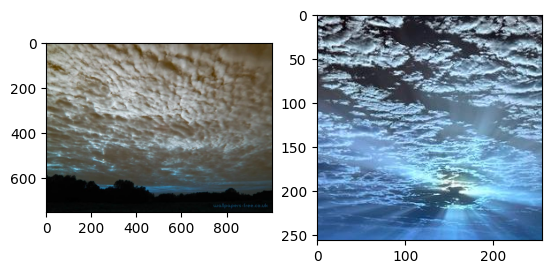

In [102]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

os.chdir('/content')

plt.figure()
f, axarr = plt.subplots(1,2)

## Check Cloud Images from Combined datasets##
img_ac = cv2.imread("/content/combined_datasets/Ac/04659e43-bb53-49bc-a53c-b1b089a65a71.jpg")
print("Ac image: ", img_ac.shape)
axarr[0].imshow(img_ac)

## Check Cloud Images from Combined datasets##
img_ac_1 = cv2.imread("/content/flickr_datasets/Ac/Altocumulus-019e85ea2430a9610d53cdf15465e25fab84d5dbe3e3083374ef268b827d229a.jpg")
print("Ac_1 image: ", img_ac_1.shape)
axarr[1].imshow(img_ac_1)

Note that picture from combined datasets has a large size compared to datasets from flickr. We have to resize them

### Using Pillow package to resize and crop cloud type

In [104]:
import os
from PIL import Image

def resize_and_save(source_directory, target_directory, target_size=(256, 256)):
    for root, dirs, files in os.walk(source_directory):

        rel_path = os.path.relpath(root, source_directory)
        dest_dir = os.path.join(target_directory, rel_path)
        if not os.path.exists(dest_dir):
            os.makedirs(dest_dir)

        # Resize each image and save it to the new directory
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                src_file_path = os.path.join(root, file)
                img = Image.open(src_file_path)
                img = img.resize(target_size, Image.ANTIALIAS)
                dest_file_path = os.path.join(dest_dir, file)
                img.save(dest_file_path)
                print(f"Resized and saved {file} to {dest_file_path}")

# Paths to the source and destination directories
source_directory = '/content/combined_datasets'
target_directory = '/content/combined_datasets_resized'

# Resize all images and save to new directory
resize_and_save(source_directory, target_directory)


<ipython-input-104-0ba60eb6acd8>:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


Resized and saved 9655053f-9704-47a8-bbc2-5cfbf939260b.jpg to /content/combined_datasets_resized/Ci/9655053f-9704-47a8-bbc2-5cfbf939260b.jpg
Resized and saved Ci-N138.jpg to /content/combined_datasets_resized/Ci/Ci-N138.jpg
Resized and saved e85bebdd-5ad8-4a7d-b45c-7e60aa142d20.jpg to /content/combined_datasets_resized/Ci/e85bebdd-5ad8-4a7d-b45c-7e60aa142d20.jpg
Resized and saved d2a9f0c8-dc3b-4047-aa64-e8f797e5aca4.jpg to /content/combined_datasets_resized/Ci/d2a9f0c8-dc3b-4047-aa64-e8f797e5aca4.jpg
Resized and saved Ci-N062.jpg to /content/combined_datasets_resized/Ci/Ci-N062.jpg
Resized and saved Ci-N024.jpg to /content/combined_datasets_resized/Ci/Ci-N024.jpg
Resized and saved 2a0acb44-69cb-4501-9a10-f755a7697215.jpg to /content/combined_datasets_resized/Ci/2a0acb44-69cb-4501-9a10-f755a7697215.jpg
Resized and saved cd7e28cc-34c8-451b-9a69-884b33bf3ee4.jpg to /content/combined_datasets_resized/Ci/cd7e28cc-34c8-451b-9a69-884b33bf3ee4.jpg
Resized and saved eec88cb1-70de-4b9c-af81-e1df

#### Recheck again the size of the image

Ac image:  (256, 256, 3)
Ac_1 image:  (256, 256, 3)
Ac image:  (256, 256, 3)
Ac_1 image:  (256, 256, 3)


<Figure size 640x480 with 0 Axes>

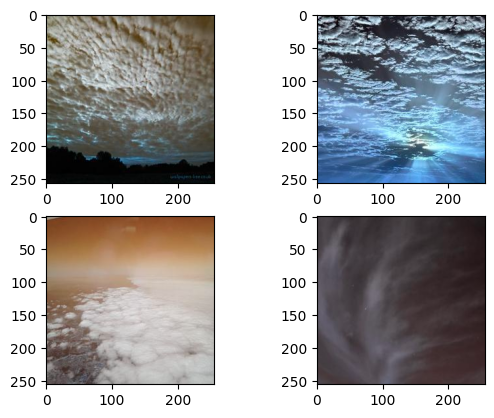

In [109]:
plt.figure()
f, axarr = plt.subplots(2,2)

## ReCheck Cloud Images from Combined datasets##
img_ac = cv2.imread("/content/combined_datasets_resized/Ac/04659e43-bb53-49bc-a53c-b1b089a65a71.jpg")
print("Ac image: ", img_ac.shape)
axarr[0][0].imshow(img_ac)

## reCheck Cloud Images from flickr datasets##
img_ac_1 = cv2.imread("/content/flickr_datasets/Ac/Altocumulus-019e85ea2430a9610d53cdf15465e25fab84d5dbe3e3083374ef268b827d229a.jpg")
print("Ac_1 image: ", img_ac_1.shape)
axarr[0][1].imshow(img_ac_1)

## another image from combined datasets##
img_ci = cv2.imread("/content/combined_datasets_resized/Ci/01220188-62c0-45bd-b46e-061f62ca5c44.jpg")
print("Ac image: ", img_ci.shape)
axarr[1][0].imshow(img_ci)

## reCheck Cloud Images from flickr datasets##
img_ci_1 = cv2.imread("/content/flickr_datasets/Ci/cirrus-00e633ba4dcdc12e1920b256a6a0e72fc86100369ba5fa244a5a204ad3ef0a7e.jpg")
print("Ac_1 image: ", img_ci_1.shape)
axarr[1][1].imshow(img_ci_1)

Now we have identical image size for both datasets

#### Recombined them to make it easier for Data Processing

In [134]:
import shutil

final_path = '/content/final_datasets'
for dir_name in os.listdir(flickr_directory):
    final_subdir = os.path.join(final_path, dir_name)
    if not os.path.exists(final_subdir):
        os.makedirs(final_subdir)

# Function to copy files from source to destination
def copy_files(source_path):
    for dir_name in os.listdir(source_path):
        source_dir_path = os.path.join(source_path, dir_name)
        destination_dir_path = os.path.join(final_path, dir_name)

        if not os.path.exists(destination_dir_path):
            os.makedirs(destination_dir_path)


        for file_name in os.listdir(source_dir_path):
            src_file_path = os.path.join(source_dir_path, file_name)
            dst_file_path = os.path.join(destination_dir_path, file_name)

            file_counter = 1
            while os.path.exists(dst_file_path):
                name, ext = os.path.splitext(file_name)
                new_name = f"{name}_{file_counter}{ext}"
                dst_file_path = os.path.join(destination_dir_path, new_name)
                file_counter += 1

            # Copy the file to the destination directory
            shutil.copy(src_file_path, dst_file_path)

copy_files(flickr_directory)
copy_files(combined_directory)


#### Count how many files there are

In [118]:
flickr_path = '/content/flickr_datasets'
flickr_dir = os.listdir(flickr_path)

for dir_name in flickr_dir:
    # Create the full path to the directory
    dir_path = os.path.join(flickr_path, dir_name)

    # Get a list of files in the directory
    files = os.listdir(dir_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dir_name}: {num_files} files")

Ci: 352 files
Ns: 352 files
Sc: 352 files
Cu: 352 files
Cc: 365 files
Ac: 379 files
As: 361 files
St: 74 files
.ipynb_checkpoints: 0 files
Cb: 352 files
Cs: 332 files
Ct: 352 files


In [122]:
combined_path = '/content/combined_datasets_resized'
combined_dir = os.listdir(combined_path)

for dira_name in flickr_dir:
    # Create the full path to the directory
    dira_path = os.path.join(combined_path, dira_name)

    # Get a list of files in the directory
    files = os.listdir(dira_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dira_name}: {num_files} files")

Ci: 194 files
Ns: 293 files
Sc: 340 files
Cu: 297 files
Cc: 236 files
Ac: 253 files
As: 252 files
St: 394 files


FileNotFoundError: [Errno 2] No such file or directory: '/content/combined_datasets_resized/.ipynb_checkpoints'

In [131]:
import shutil

# Specify the file path
ipynb = '/content/final_datasets/.ipynb_checkpoints'

# Remove the file
if os.path.exists(ipynb):
    shutil.rmtree(ipynb)
    print(f"File {ipynb} has been deleted.")
else:
    print(f"The file {ipynb} does not exist.")


File /content/final_datasets/.ipynb_checkpoints has been deleted.


In [132]:
final_dir = os.listdir(final_path)

for dir_name in final_dir:
    # Create the full path to the directory
    dir_path = os.path.join(final_path, dir_name)

    # Get a list of files in the directory
    files = os.listdir(dir_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dir_name}: {num_files} files")

print("#Categories: ", len(os.listdir(final_path)))


Ci: 546 files
Ns: 645 files
Sc: 692 files
Cu: 649 files
Cc: 601 files
Ac: 632 files
As: 613 files
St: 468 files
Cb: 669 files
Cs: 518 files
Ct: 507 files
#Categories:  11


Note that from above final datasets, there are imbalance pictures from each cloud type. Let's choose them randomly to 450 pictures for each type of cloud

In [135]:
import os
import shutil
import random

# Path to the source directory containing the imbalanced datasets
source_directory = '/content/final_datasets'

# Path to the target directory where the balanced datasets will be stored
target_directory = '/content/final_datasets_balance'

# Number of images to select per category
images_per_category = 450

# Ensure the target directory exists
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# Function to randomly select and copy images
def balance_datasets(source_dir, target_dir, num_images):
    # Process each subdirectory in the source directory
    for category in os.listdir(source_dir):
        source_cat_dir = os.path.join(source_dir, category)
        target_cat_dir = os.path.join(target_dir, category)

        # Make sure the target category directory exists
        if not os.path.exists(target_cat_dir):
            os.makedirs(target_cat_dir)

        # List all files in the category directory
        all_files = os.listdir(source_cat_dir)
        # Filter out non-image files if needed
        image_files = [file for file in all_files if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # Select a random subset of images
        if len(image_files) > num_images:
            selected_files = random.sample(image_files, num_images)
        else:
            selected_files = image_files  # If fewer than num_images exist, take all

        # Copy the selected images to the target category directory
        for file in selected_files:
            src_file_path = os.path.join(source_cat_dir, file)
            dst_file_path = os.path.join(target_cat_dir, file)
            shutil.copy2(src_file_path, dst_file_path)

# Execute the function to balance the datasets
balance_datasets(source_directory, target_directory, images_per_category)

print("Datasets have been balanced and copied.")


Datasets have been balanced and copied.


In [138]:
# Specify the file path
ipynb = '/content/final_datasets_balance/.ipynb_checkpoints'

# Remove the file
if os.path.exists(ipynb):
    shutil.rmtree(ipynb)
    print(f"File {ipynb} has been deleted.")
else:
    print(f"The file {ipynb} does not exist.")


File /content/final_datasets_balance/.ipynb_checkpoints has been deleted.


In [157]:
final_balance_path = '/content/final_datasets_balance'
final_balance_dir = os.listdir(final_balance_path)

for dir_name in final_balance_dir:
    # Create the full path to the directory
    dir_path = os.path.join(final_balance_path, dir_name)

    # Get a list of files in the directory
    files = os.listdir(dir_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dir_name}: {num_files} files")

print("#Categories: ", len(os.listdir(final_balance_path)))


Ci: 450 files
Ns: 450 files
Sc: 450 files
Cu: 450 files
Cc: 450 files
Ac: 450 files
As: 450 files
St: 450 files
Cb: 450 files
Cs: 450 files
Ct: 450 files
#Categories:  11


#### Download the final datasets for backup

In [143]:
import os
from google.colab import files

# Path to the directory you want to zip and download
directory_path = '/content/final_datasets_balance'

# Create a zip file from the entire directory
zip_path = '/content/final_datasets.zip'
os.system(f"zip -r {zip_path} {directory_path}")

# Download the zip file
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Back it up to Google drive

In [144]:
# Path to the directory you want to copy
final_balance_directory = '/content/final_datasets_balance'

# Path in your Google Drive where you want to store the data
final_destination_directory = '/content/drive/MyDrive/Kuliah/UCL/Projects/CASA0018-Cloud-Classification/Projects/Final_Project/Datasets/final_datasets'

# Copy the entire directory to Google Drive
!cp -r {final_balance_directory} {final_destination_directory}

print("Files have been copied to your Google Drive.")

Files have been copied to your Google Drive.


### **Split Data**

Training : Validation : Testing = 6 : 2 : 2

Here, only splitting training (including validation) and tesing datasets. We will split the training and validation dataset later on 'Image Data Generator' step.

In [153]:
import os
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    random.seed(1007)  # Setting a fixed seed for reproducibility

    files = []
    for filename in os.listdir(SOURCE):
        file_path = os.path.join(SOURCE, filename)
        if os.path.getsize(file_path) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = len(files) - training_length
    shuffled_files = random.sample(files, len(files))

    training_files = shuffled_files[:training_length]
    testing_files = shuffled_files[-testing_length:]

    for filename in training_files:
        copyfile(os.path.join(SOURCE, filename), os.path.join(TRAINING, filename))
    for filename in testing_files:
        copyfile(os.path.join(SOURCE, filename), os.path.join(TESTING, filename))

# Main variables
dataset_dir = "/content/final_datasets_balance"
split_size = 0.8

# Cloud types and contrail categories
categories = ['Ac', 'As', 'Cb', 'Cc', 'Ci', 'Cs', 'Ct', 'Cu', 'Ns', 'Sc', 'St']

# Create directories and split data for each category
for category in categories:
    source_dir = os.path.join(dataset_dir, category)
    training_dir = os.path.join("/content/final_datasets_train", category)
    testing_dir = os.path.join("/content/final_datasets_test", category)

    # Ensure the training and testing directories exist
    os.makedirs(training_dir, exist_ok=True)
    os.makedirs(testing_dir, exist_ok=True)

    # Call the function to split data
    split_data(source_dir, training_dir, testing_dir, split_size)


In [155]:
train_path = '/content/final_datasets_train'
train_dir = os.listdir(train_path)

test_path = '/content/final_datasets_test'
test_dir = os.listdir(test_path)

print("train files")
for dir_name in train_dir:
    # Create the full path to the directory
    dir_path = os.path.join(train_path, dir_name)

    # Get a list of files in the directory
    files = os.listdir(dir_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dir_name}: {num_files} files")

print("test files")

for dir_name in test_dir:
    # Create the full path to the directory
    dir_path = os.path.join(test_path, dir_name)

    # Get a list of files in the directory
    files = os.listdir(dir_path)

    # Count the number of files
    num_files = len(files)

    # Print the directory name and the number of files it contains
    print(f"{dir_name}: {num_files} files")


train files
Ci: 360 files
Ns: 360 files
Sc: 360 files
Cu: 360 files
Cc: 360 files
Ac: 360 files
As: 360 files
St: 360 files
Cb: 360 files
Cs: 360 files
Ct: 360 files
test files
Ci: 90 files
Ns: 90 files
Sc: 90 files
Cu: 90 files
Cc: 90 files
Ac: 90 files
As: 90 files
St: 90 files
Cb: 90 files
Cs: 90 files
Ct: 90 files


## **Training model**

Instructions :
1. Run Image Data Gen
2. Choose the best solution to train a model


### **Image Data Generator**

In [160]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory paths
TRAINING_DIR = '/content/final_datasets_train'
TESTING_DIR = '/content/final_datasets_test'

batch_size_generator = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,     # Normalize pixel values from 0-255 to 0-1
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.25  # 6:2:2
)

# Training Generator
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=batch_size_generator,
    class_mode='categorical',
    target_size=(256, 256),
    subset='training',  # Use the training part of the data
    shuffle=True  # Shuffle the inputs for better training
)

# Validation Generator
validation_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=batch_size_generator,
    class_mode='categorical',
    target_size=(256, 256),
    subset='validation',  # Use the validation part of the data
    shuffle=True  # Shuffle the inputs for better model evaluation
)


# Testing Generator
testing_datagen = ImageDataGenerator(rescale=1./255)
testing_generator = testing_datagen.flow_from_directory(
    TESTING_DIR,
    batch_size=1,  # Typically set to 1 for testing to handle one image at a time
    class_mode='categorical',
    target_size=(256, 256),
    shuffle=False  # No need to shuffle testing data
)

# Function to print batch information for debugging
def print_batch_info(generator):
    data_batch, labels_batch = next(generator)
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)


# Print batch info for training and validation to ensure correct setup
print_batch_info(train_generator)
print_batch_info(validation_generator)

# Calculating steps per epoch and validation steps
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

print('Steps per epoch:', steps_per_epoch)
print('Validation steps:', validation_steps)

Found 2970 images belonging to 11 classes.
Found 990 images belonging to 11 classes.
Found 990 images belonging to 11 classes.
Data batch shape: (32, 256, 256, 3)
Labels batch shape: (32, 11)
Data batch shape: (32, 256, 256, 3)
Labels batch shape: (32, 11)
Steps per epoch: 93
Validation steps: 31


### **1. Keras Sequential model**

In [161]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),  # Adjusted input shape
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Adjusted for 10 classes
])

model.compile(optimizer=RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0